# SQL Homework | Week 9 | Bonus Portion

Bonus portion consists of visualizing data from the Pewlett Hackard employees database built in PostgreSQL using Pandas, SQLAlchemy and matplotlib.

## Step 1: Importing data from PostgreSQL into Pandas

To do this we will use the SQLAlchemy library. Database connection parameters including password, user, port, and database name are all stored in a local file (config.py) that is not part of the github repository (ignored by `git` thanks to the `.gitignore` file) to avoid credentials exposure.

In [1]:
%pip install pg8000
import config as cfg
from sqlalchemy import create_engine
engine = create_engine('postgresql+pg8000://' +
                       cfg.postgresql['user'] + ':' +
                       cfg.postgresql['passwd'] + '@' +
                       cfg.postgresql['host'] + ':' +
                       str(cfg.postgresql['port']) + '/' +
                       cfg.postgresql['db'])
connection = engine.connect()

Note: you may need to restart the kernel to use updated packages.


## Step 2: Creating and executing a SQL and storing the results into a DataFrame

Using the SQLAlchemy connection from the previous stage execute a query to get average salary per title and store the results in a Pandas DataFrame called `df`.

In [6]:
import pandas as pd

sql = """
SELECT title, AVG(salary) AS avg_salary
  FROM employees AS e
       INNER JOIN salaries AS s
       ON e.emp_no = s.emp_no
   
       INNER JOIN titles AS t
       ON e.emp_no = t.emp_no
 GROUP BY title
 ORDER BY title ASC;
"""

df = pd.read_sql(sql, connection, index_col='title')
df

,avg_salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


# Step 3: Plot Average Salary vs Title

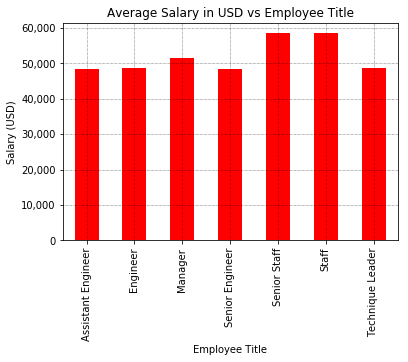

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(kind='bar',color='red', ax=ax)
ax.set_title('Average Salary in USD vs Employee Title')
ax.set_xlabel('Employee Title')
ax.set_ylabel('Salary (USD)')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.get_legend().remove()

# Step 4: Observations

It seems salaries data shows there are no significant differences when Senior Engineers, Engineers, and Assistant Engineers are compared using the average. This is a strong indication that either the data is bogus or there is a strong communist ideology in this company.